In [1]:
%load_ext autoreload
%autoreload 2

from gpu import set_gpu
import numpy as np
import os
import adapt.utils.data_utils as prd
import adapt.loop as lp
import adapt.ml.lda as dlda
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import adapt.ml.dl_subclass as dl
import copy as cp
import tensorflow as tf
import pickle
from datetime import datetime
import time

set_gpu()
policy = tf.keras.mixed_precision.experimental.Policy('mixed_float16')
tf.keras.mixed_precision.experimental.set_policy(policy)

Using TensorFlow backend.


Num GPUs Available:  1


In [ ]:
sub = 3
path = 'C:/Users/yteh/Documents/work/necal/home data/'
subs = os.listdir(path)
if 'skip' in subs:
    subs = np.delete(subs,subs.index('skip'))
path += subs[sub] + '/DATA/MAT/'
all_files = os.listdir(path)
if 'skip' in all_files:
    all_files = np.delete(all_files,all_files.index('skip'))
print(subs)

In [ ]:
all_files = np.delete(all_files,0)

TR62
setting CNN weights
Set: 20180515_060621, Test: 20180521_090336, Accuracy: 70.17 , Val: 93.86 , Prev: 0.00 , Train: 94.61
Set: 20180515_060621, Test: 20180524_161811, Accuracy: 76.52 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180515_060621, Test: 20180525_084201, Accuracy: 76.21 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180515_060621, Test: 20180531_073149, Accuracy: 69.34 , Val: 0.00 , Prev: 0.00 , Train: 0.00
recal: 1 20180531_073149
Initial val acc 0: 0.9386, val acc 1: 0.7014
time: 12.815687656402588
Final val acc 0: 0.7920, val acc 1: 0.8980
Initial val acc 0: 0.9386, val acc 1: 0.7014
loss:1.1722064, fish: 0.0, lam: 30
loss:1.4082338, fish: 3.5658997e-13, lam: 30
loss:0.8233977, fish: 1.5762284e-09, lam: 30, rat: 0
loss:0.64258033, fish: 5.2538596e-09, lam: 30, rat: 0
loss:0.5734938, fish: 7.3844295e-09, lam: 30, rat: 0
loss:0.53224343, fish: 8.5859515e-09, lam: 30, rat: 0
loss:0.50289357, fish: 9.3244354e-09, lam: 30, rat: 0
loss:0.47998938, fish: 1.037276e-08, lam: 

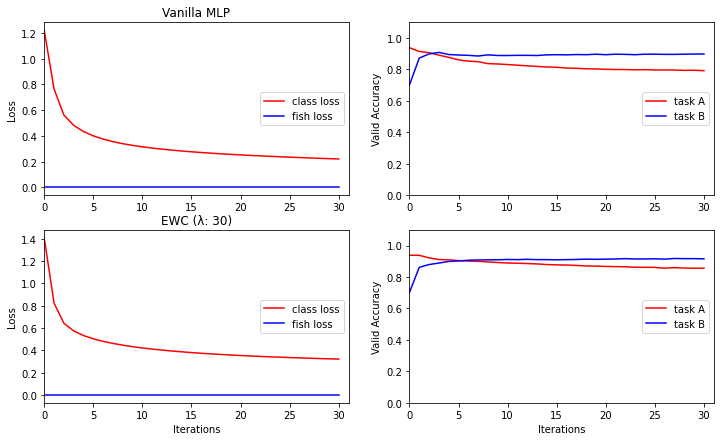

Set: 20180531_073149, Test: 20180602_105936, Accuracy: 83.86 , Val: 91.57 , Prev: 85.61 , Train: 95.52
Set: 20180531_073149, Test: 20180604_090437, Accuracy: 79.02 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180531_073149, Test: 20180604_214053, Accuracy: 82.77 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180531_073149, Test: 20180605_080547, Accuracy: 82.98 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180531_073149, Test: 20180606_174322, Accuracy: 60.91 , Val: 0.00 , Prev: 0.00 , Train: 0.00
recal: 2 20180606_174322
Initial val acc 0: 0.9157, val acc 1: 0.6715
time: 14.990509271621704
Final val acc 0: 0.8554, val acc 1: 0.7983
Initial val acc 0: 0.9157, val acc 1: 0.6715
loss:1.6415155, fish: 0.0, lam: 30
loss:1.7643682, fish: 3.973532e-13, lam: 30
loss:1.3166832, fish: 1.2950441e-09, lam: 30, rat: 0
loss:1.0085459, fish: 6.389491e-09, lam: 30, rat: 0
loss:0.88524336, fish: 1.5787226e-08, lam: 30, rat: 0
loss:0.8185706, fish: 2.9433858e-08, lam: 30, rat: 0
loss:0.7733279, fish: 4

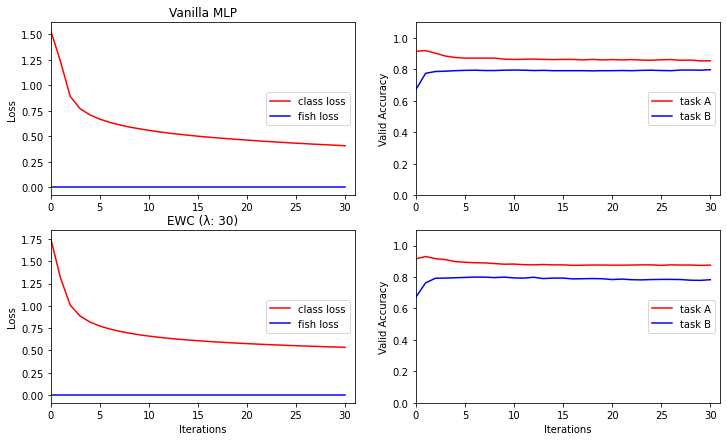

Set: 20180606_174322, Test: 20180610_081839, Accuracy: 70.22 , Val: 78.27 , Prev: 87.51 , Train: 89.68
Set: 20180606_174322, Test: 20180612_085047, Accuracy: 60.80 , Val: 0.00 , Prev: 0.00 , Train: 0.00
recal: 3 20180612_085047
Initial val acc 0: 0.7827, val acc 1: 0.5963
time: 19.92655897140503
Final val acc 0: 0.7547, val acc 1: 0.8002
Initial val acc 0: 0.7827, val acc 1: 0.5963
loss:1.1313804, fish: 0.0, lam: 30
loss:0.99777347, fish: 4.924198e-13, lam: 30
loss:0.8242644, fish: 1.6595634e-09, lam: 30, rat: 0
loss:0.66933715, fish: 1.0319425e-08, lam: 30, rat: 0
loss:0.5998269, fish: 2.4094868e-08, lam: 30, rat: 0
loss:0.5581843, fish: 3.8937056e-08, lam: 30, rat: 0
loss:0.5300485, fish: 5.5492627e-08, lam: 30, rat: 0
loss:0.5094211, fish: 7.022419e-08, lam: 30, rat: 0
loss:0.49368718, fish: 8.416963e-08, lam: 30, rat: 0
loss:0.48091727, fish: 1.0116593e-07, lam: 30, rat: 0
loss:0.4706411, fish: 1.14897844e-07, lam: 30, rat: 0
loss:0.4621484, fish: 1.3072352e-07, lam: 30, rat: 0
los

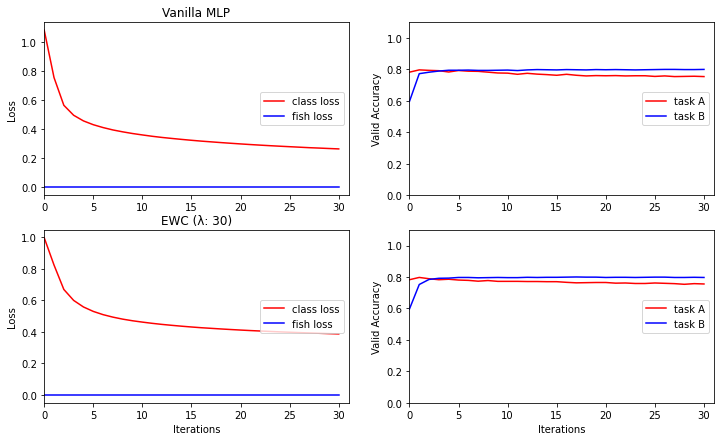

Set: 20180612_085047, Test: 20180614_081624, Accuracy: 75.12 , Val: 79.71 , Prev: 75.57 , Train: 94.69
Set: 20180612_085047, Test: 20180616_182930, Accuracy: 70.80 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180612_085047, Test: 20180617_184248, Accuracy: 60.44 , Val: 0.00 , Prev: 0.00 , Train: 0.00
skip bad set: 20180617_184248, accuracy: 44.95
Set: 20180617_184248, Test: 20180619_184831, Accuracy: 29.05 , Val: 0.00 , Prev: 0.00 , Train: 0.00
skip bad set: 20180619_184831, accuracy: 38.98
Set: 20180619_184831, Test: 20180619_193541, Accuracy: 78.81 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180619_184831, Test: 20180620_073139, Accuracy: 68.51 , Val: 0.00 , Prev: 0.00 , Train: 0.00
recal: 4 20180620_073139
Initial val acc 0: 0.7971, val acc 1: 0.6972
time: 17.864871978759766
Final val acc 0: 0.7242, val acc 1: 0.9376
Initial val acc 0: 0.7971, val acc 1: 0.6972
loss:0.85693884, fish: 0.0, lam: 30
loss:0.7542973, fish: 1.0540989e-12, lam: 30
loss:0.73780346, fish: 6.493236e-09, la

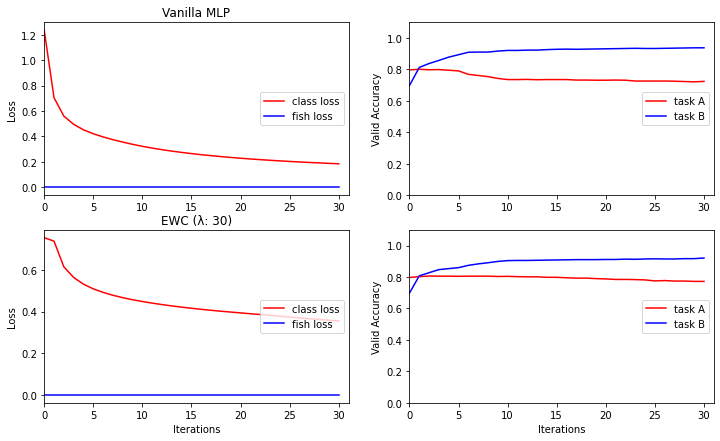

Set: 20180620_073139, Test: 20180620_073838, Accuracy: 83.39 , Val: 92.09 , Prev: 77.21 , Train: 95.31
Set: 20180620_073139, Test: 20180620_083903, Accuracy: 73.50 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180620_073139, Test: 20180621_093741, Accuracy: 37.27 , Val: 0.00 , Prev: 0.00 , Train: 0.00
skip bad set: 20180621_093741, accuracy: 29.63
Set: 20180621_093741, Test: 20180621_094013, Accuracy: 81.83 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180621_093741, Test: 20180623_200107, Accuracy: 72.57 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180621_093741, Test: 20180703_072425, Accuracy: 74.34 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180621_093741, Test: 20180711_074144, Accuracy: 76.00 , Val: 0.00 , Prev: 0.00 , Train: 0.00
Set: 20180621_093741, Test: 20180711_113445, Accuracy: 63.30 , Val: 0.00 , Prev: 0.00 , Train: 0.00
recal: 5 20180711_113445
Initial val acc 0: 0.9209, val acc 1: 0.5983
time: 16.230400800704956
Final val acc 0: 0.7773, val acc 1: 0.7190
Initial val 

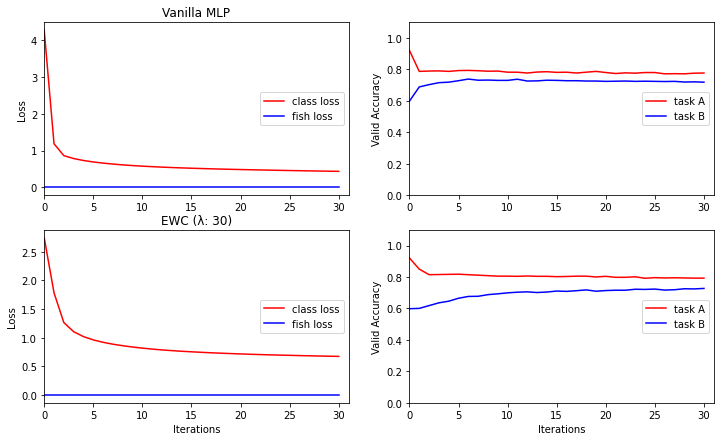

Set: 20180711_113445, Test: 20180713_102029, Accuracy: 75.48 , Val: 72.74 , Prev: 79.29 , Train: 87.60
Set: 20180711_113445, Test: 20180717_073851, Accuracy: 68.14 , Val: 0.00 , Prev: 0.00 , Train: 0.00
recal: 6 20180717_073851
Initial val acc 0: 0.7274, val acc 1: 0.7128
time: 15.73013949394226
Final val acc 0: 0.6535, val acc 1: 0.8293
Initial val acc 0: 0.7274, val acc 1: 0.7128
loss:1.5955849, fish: 0.0, lam: 30
loss:1.3113954, fish: 1.5419072e-12, lam: 30
loss:0.90715396, fish: 2.0699366e-08, lam: 30, rat: 0
loss:0.72406083, fish: 1.003608e-07, lam: 30, rat: 0
loss:0.66208076, fish: 2.1230736e-07, lam: 30, rat: 0
loss:0.6257042, fish: 3.5942455e-07, lam: 30, rat: 0
loss:0.6002, fish: 5.2363254e-07, lam: 30, rat: 0
loss:0.5811899, fish: 6.940343e-07, lam: 30, rat: 0
loss:0.5658637, fish: 8.9847487e-07, lam: 30, rat: 0
loss:0.55371857, fish: 1.1198953e-06, lam: 30, rat: 0
loss:0.5433714, fish: 1.3374845e-06, lam: 30, rat: 0
loss:0.53455806, fish: 1.5624915e-06, lam: 30, rat: 0
loss:

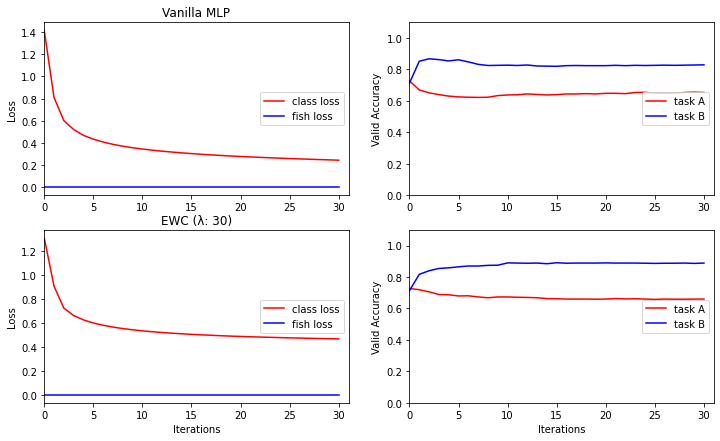

Set: 20180717_073851, Test: 20180717_112511, Accuracy: 78.08 , Val: 88.87 , Prev: 65.97 , Train: 89.27
acewc30 6


In [20]:
# Count recalibrations
path = 'C:/Users/yteh/Documents/work/necal/home data/'
subs = os.listdir(path)
if 'skip' in subs:
    subs = np.delete(subs,subs.index('skip'))
bat = 32
load_mod = True
mod_tot = ['blda','lda','crlda','alda','bcnn','cnn', 'crcnn','acnn03','acnn30','acewc00','acewc30', 'adcnn30', 'bcnnl', 'cnnl', 'crcnnl', 'acnnl03','acewcl','acnnlm','acewclm','xtra','xtra1','xtra2']
ft = 'feat'
iter = 1

for sub in range(4,5):
    print(subs[sub])
    sub_path = path + subs[sub] + '/DATA/MAT/'
    all_files = os.listdir(sub_path)
    if 'skip' in all_files:
        all_files = np.delete(all_files,all_files.index('skip'))

    for it in range(0,iter):
        # first iteration, includes LDA; others exclude LDA
        if it == 0:
            mod_all = ['acewc30']
        else:
            mod_all = ['cnnl','acnnl3','acnnl5','acnnl30','acewcl']

        # load or initialize cnn weights
        if load_mod:
            with open(subs[sub] + '_' + str(it) + '_r_accs.p','rb') as f:
                all_acc, all_recal, all_val, all_prev, all_train, _, _, c_weights, cl_wc, scaler_0, emg_scale = pickle.load(f)
        else:
            c_weights = None
            cl_wc = None
            all_recal = np.empty((len(mod_tot),1))
            all_recal[:] = np.nan
            all_acc = np.zeros((len(all_files),len(mod_tot)))
            all_val = np.zeros((len(all_files),len(mod_tot)))
            all_prev = np.zeros((len(all_files),len(mod_tot)))
            all_train = np.zeros((len(all_files),len(mod_tot)))
            all_times = np.zeros((len(all_files),len(mod_tot)))

        mod_i = 0
        for mod in mod_all:
            acc = np.zeros((len(all_files),5))
            acc_val = np.zeros((len(all_files),5))
            acc_prev = np.zeros((len(all_files),5))
            acc_train = np.zeros((len(all_files),5))

            if 'cnn' in mod:
                acc_i = 2
            elif 'cewc' in mod:
                acc_i = 4
            elif 'lda' in mod:
                acc_i = 0

            cnn = None
            ewc = None

            ep = 30
            recal = 0
            skip = False

            # Loop through files
            for i in range(1,len(all_files)-1):
                # Check if need to recalibrate
                if i > 1:
                    if 'b' in mod:
                        skip = True
                    elif acc[i,acc_i] < 70:
                        skip = False
                    else:
                        skip = True
                    
                    if not skip:
                        train_file = all_files[i]
                        train_data, train_params = prd.load_caps_train(sub_path + train_file + '/traindata.mat')
                        train_data, train_params, _ = prd.threshold(train_data, train_params,th)
                            
                        tr_i = np.zeros((train_params.shape[0],))
                        te_i = np.zeros((train_params.shape[0],))
                        for cls in np.unique(train_params[:,-1]):
                            dof = np.array(np.where(train_params[:,-1] == cls))
                            tr_i[dof[0,:dof.shape[1]//2]] = 1
                            te_i[dof[0,dof.shape[1]//2:]] = 1

                        train_temp = train_data[tr_i.astype(bool),...]
                        params_temp = train_params[tr_i.astype(bool),...]
                        val_data = train_data[te_i.astype(bool),...]
                        val_params = train_params[te_i.astype(bool),...]

                        train_data, train_params = train_temp, params_temp
                        _, _, _, _, _, _, x_tr, y_tr, emg_scale_tr, _, _, _, _ = prd.prep_train_caps(train_data, train_params, prop_b=False, ft=ft, noise=False, split=False)

                        _, _, _, _, _, _, x_val, y_val, _, _, _, _, _ = prd.prep_train_caps(val_data, val_params, emg_scale=emg_scale_tr, prop_b=False, ft=ft, noise=False, split=False)

                        w, c, _, _, _, _, _ = dlda.train_lda(x_tr, y_tr)
                        skip_test = lp.test_models(None, None, x_val, None, y_val, lda=[w,c])[0]

                        if skip_test > 70:
                            skip = False
                            recal += 1
                            print('recal: ' + str(recal) + ' ' + all_files[i])
                            acc[i,acc_i] *= -1
                        else:
                            skip = True
                            print('skip bad set: ' + all_files[i] + ', ' + f'accuracy: {skip_test:.2f}')
                        
                        del skip_test, train_data, train_params, val_data, val_params, x_tr, y_tr, x_val, y_val, emg_scale_tr, train_temp, params_temp, tr_i, te_i

                if not skip:
                    # load training file
                    train_file = all_files[i]
                    train_data, train_params = prd.load_caps_train(sub_path + train_file + '/traindata.mat')

                    # if first train, use two train files
                    if i == 1:
                        train_data2, train_params2 = prd.load_caps_train(sub_path + all_files[i-1] + '/traindata.mat')
                        train_data = np.vstack((train_data,train_data2))
                        train_params = np.vstack((train_params,train_params2))
                        del train_data2, train_params2

                        train_data, train_params, th = prd.threshold(train_data, train_params)
                        val_data = train_data
                        val_params = train_params
                    else:
                        train_data, train_params, _ = prd.threshold(train_data, train_params,th)
                    
                        tr_i = np.zeros((train_params.shape[0],))
                        te_i = np.zeros((train_params.shape[0],))
                        for cls in np.unique(train_params[:,-1]):
                            dof = np.array(np.where(train_params[:,-1] == cls))
                            tr_i[dof[0,:dof.shape[1]//2]] = 1
                            te_i[dof[0,dof.shape[1]//2:]] = 1

                        train_temp = train_data[tr_i.astype(bool),...]
                        params_temp = train_params[tr_i.astype(bool),...]
                        val_data = train_data[te_i.astype(bool),...]
                        val_params = train_params[te_i.astype(bool),...]

                        train_data, train_params = train_temp, params_temp

                        del train_temp, params_temp, tr_i, te_i

                    if (i == 1 and mod[0] == 'a') or (mod[0] != 'a'):
                        train_dof = np.unique(train_params[:,-1])
                        key = np.empty(train_dof.shape)
                        for key_i in range(len(train_dof)):
                            key[key_i] = cp.deepcopy(train_params[np.argmax(train_params[:,2] == train_dof[key_i]),0])
                        n_dof = int(np.max(key))
                    
                    train_data, train_params = lp.check_labels(train_data,train_params,train_dof,key)
                    val_data, val_params = lp.check_labels(val_data,val_params,train_dof,key)

                    # if combining, save current training data
                    if 'cr' in mod:
                        # combine old and new training data
                        if i > 1:
                            train_data = np.vstack((train_data_0,train_data))
                            train_params = np.vstack((train_params_0,train_params))

                        train_data_0 = cp.deepcopy(train_data)
                        train_params_0 = cp.deepcopy(train_params)

                    if (mod[0] == 'a' and i > 1) or ('cr' in mod and i > 1):
                        _, x_clean_cnn, y_clean, _, x_train_cnn, y_train, x_train_lda, y_train_lda, _, _, _, _, _ = prd.prep_train_caps(train_data, train_params, emg_scale=emg_scale, scaler=scaler, num_classes=n_dof, prop_b=False, batch_size=bat, ft=ft, noise=True, split=False)
                    else:
                        _, x_clean_cnn, y_clean, _, x_train_cnn, y_train, x_train_lda, y_train_lda, emg_scale, scaler, _, _, _ = prd.prep_train_caps(train_data, train_params, prop_b=False, batch_size=bat, ft=ft, noise=True, split=False,num_classes=n_dof)
                        if (i == 1) and (c_weights is not None):
                            scaler = cp.deepcopy(scaler_0)

                    _, _, _, _, x_val_cnn, y_val, x_val_lda, y_val_lda, _, _, _, _, _ = prd.prep_train_caps(val_data, val_params, emg_scale=emg_scale,scaler=scaler, prop_b=False, batch_size=bat, ft=ft, num_classes=n_dof, noise=False, split=False)

                    del train_data, train_params, val_data, val_params

                    if 'lda' not in mod:
                        cnnlda = 'l' in mod
                        if i == 1:
                            if c_weights is None:
                                cnn, all_times[i,mod_tot.index(mod)], w_c, c_c = lp.train_models(traincnn=x_train_cnn,y_train=y_train, mod=['cnn'], n_dof=n_dof, ep=ep, cnnlda=cnnlda)
                                c_weights = cp.deepcopy(cnn.get_weights())
                                scaler_0 = cp.deepcopy(scaler)    
                                cl_wc = cp.deepcopy([w_c,c_c])
                            else:
                                print('setting CNN weights')
                                cnn = dl.CNN(n_class=n_dof)
                                cnn(x_train_cnn[:1,...])
                                cnn.set_weights(c_weights)
                                if cnnlda:
                                    print('setting LDA weights')
                                    w_c = cp.deepcopy(cl_wc[0].astype('float32'))
                                    c_c = cp.deepcopy(cl_wc[1].astype('float32'))
                            
                            if 'ewc' in mod:
                                ewc = dl.EWC(mod='CNN', n_class=n_dof)
                                ewc(x_train_cnn[:1,...])
                                ewc.set_weights(c_weights)
                            if 'ad' in mod:
                                cnn = dl.CNN(n_class=n_dof,adapt=True)
                                cnn(x_train_cnn[:1,...])
                                cnn.set_weights(c_weights)

                            if 'l' in mod:
                                clda = [w_c, c_c]
                            else:
                                clda = None
                        else:
                            if mod =='acnnlm': # update CNN encoder using lda for loss
                                ep = 5
                                cnn, all_times[i,mod_tot.index(mod)], _, _ = lp.train_models(traincnn=x_train_cnn,y_train=y_train, n_dof=n_dof, ep=ep, mod=[[cnn,w_c,c_c]],cnnlda=cnnlda)
                            elif 'adcnn' in mod: # adapt first layer only
                                # cnn.base.trainable=False
                                cnn.clf.trainable=False
                                ep = int(mod[-2:])
                                cnn, all_times[i,mod_tot.index(mod)], _, _ = lp.train_models(traincnn=x_train_cnn,y_train=y_train, n_dof=n_dof, ep=ep, mod=[cnn], adapt=True, cnnlda=cnnlda, lr=0.00001)
                            elif 'acnn' in mod: # update whole CNN and lda weights
                                ep = int(mod[-2:])
                                cnn, all_times[i,mod_tot.index(mod)], w_c, c_c = lp.train_models(traincnn=x_train_cnn,y_train=y_train, n_dof=n_dof, ep=ep, mod=[cnn], cnnlda=cnnlda, lr=0.00001)
                            elif mod == 'afcnnl': # update lda only 
                                w_c, c_c = lp.train_models(x_train_lda=cnn.enc(x_train_cnn).numpy(), y_train_lda=np.argmax(y_train,axis=1)[...,np.newaxis], mod=['lda'])
                            elif 'cnn' in mod: # recalibrate cnnlda
                                cnn, all_times[i,mod_tot.index(mod)], w_c, c_c = lp.train_models(traincnn=x_train_cnn,y_train=y_train, mod=['cnn'], n_dof=n_dof, ep=ep, cnnlda=cnnlda)
                            elif mod == 'acewclm':
                                _, _, all_times[i,mod_tot.index(mod)] = lp.train_task(ewc, ep, 1, x_train_cnn, y_train, [x_val_cnn], [y_val], lams=[int(mod[-2:])], bat=bat, clda=[w_c,c_c], cnnlda=cnnlda)
                            elif 'acewc' in mod:
                                w_c, c_c = lp.train_task(ewc, ep, 1, x_train_cnn, y_train, [prev_x, x_val_cnn],[prev_y, y_val], lams=[0,int(mod[-2:])], bat=bat, cnnlda=cnnlda)
                            
                            if 'l' in mod:
                                clda = [w_c, c_c]
                            else:
                                clda = None

                            if 'cnn' in mod:
                                acc_prev[i,:] = lp.test_models(prev_x, None, None, prev_y, None, cnn=cnn, clda=clda)
                            elif 'ewc' in mod: 
                                acc_prev[i,:] = lp.test_models(prev_x, None, None, prev_y, None, ewc_cnn=ewc, clda=clda)

                        if 'cnn' in mod:
                            acc_val[i,:] = lp.test_models(x_val_cnn, None, None, y_val, None, cnn=cnn, clda=clda)
                            acc_train[i,:] = lp.test_models(x_clean_cnn, None, None, y_clean, None, cnn=cnn, clda=clda)
                        elif 'ewc' in mod:
                            acc_val[i,:] = lp.test_models(x_val_cnn, None, None, y_val, None, ewc_cnn=ewc, clda=clda)
                            acc_train[i,:] = lp.test_models(x_clean_cnn, None, None, y_clean, None, ewc_cnn=ewc, clda=clda)
                            
                            ewc.compute_fisher(x_clean_cnn, y_clean, num_samples=200, plot_diffs=False) 
                            ewc.star()
                    else:
                        start_time = time.time()
                        if mod[0] != 'a' or (i == 1 and mod[0] == 'a'):
                            w, c, mu_class, _, _, N, cov_class = dlda.train_lda(x_train_lda, y_train_lda)
                        else:
                            w, c, mu_class, cov_class, N = dlda.update_lda(x_train_lda, y_train_lda, N, mu_class, cov_class)
                        all_times[i,mod_tot.index(mod)] = time.time() - start_time

                        acc_val[i,:] = lp.test_models(None, None, x_val_lda, None, y_val_lda, lda=[w,c])
                        acc_train[i,:] = lp.test_models(None, None, x_train_lda, None, y_train_lda, lda=[w,c])
                        if i > 1:
                            acc_prev[i,:] = lp.test_models(None, None, prev_x_lda, None, prev_y_lda, lda=[w,c])
                        del x_train_lda, y_train_lda
                    
                    prev_x = cp.deepcopy(x_val_cnn)
                    prev_y = cp.deepcopy(y_val)
                    prev_x_lda = cp.deepcopy(x_val_lda)
                    prev_y_lda = cp.deepcopy(y_val_lda)
                    
                    del x_train_cnn, y_train, x_val_cnn, y_val, x_val_lda, y_val_lda, x_clean_cnn, y_clean
                
                # load data
                test_file = all_files[i+1]
                test_data, test_params = prd.load_caps_train(sub_path + test_file + '/traindata.mat')
                
                # check class labels
                test_data, test_params, _ = prd.threshold(test_data, test_params, th)
                test_data, test_params = lp.check_labels(test_data,test_params,train_dof,key)

                # test 
                y_test, _, x_test_cnn, x_test_lda, y_test_lda = prd.prep_test_caps(test_data, test_params, scaler, emg_scale, num_classes=n_dof, ft=ft, split=False)

                # test 
                if 'cnn' in mod:
                    if 'cnnl' in mod:
                        acc[i+1,:] = lp.test_models(x_test_cnn, None, x_test_lda, y_test, y_test_lda, cnn=cnn, clda=[w_c,c_c])
                    else:
                        acc[i+1,:] = lp.test_models(x_test_cnn, None, x_test_lda, y_test, y_test_lda, cnn)
                elif 'cewc' in mod:
                    if 'cewcl' in mod:
                        acc[i+1,:] = lp.test_models(x_test_cnn, None, x_test_lda, y_test, y_test_lda, ewc_cnn=ewc, clda=[w_c,c_c])
                    else:
                        acc[i+1,:] = lp.test_models(x_test_cnn, None, x_test_lda, y_test, y_test_lda, ewc_cnn=ewc)
                elif 'lda' in mod:
                    acc[i+1,:] = lp.test_models(x_test_cnn, None, x_test_lda, y_test, y_test_lda, lda=[w,c])

                print ('Set: ' + train_file + ', Test: ' + test_file + ',', f'Accuracy: {acc[i+1,acc_i]:.2f}', f', Val: {acc_val[i,acc_i]:.2f}', f', Prev: {acc_prev[i,acc_i]:.2f}', f', Train: {acc_train[i,acc_i]:.2f}')
                del y_test, x_test_cnn, x_test_lda, y_test_lda, test_data, test_params

            all_acc[:,mod_tot.index(mod)] = acc[:,acc_i]
            all_recal[mod_tot.index(mod)] = recal
            all_val[:,mod_tot.index(mod)] = acc_val[:,acc_i]
            all_prev[:,mod_tot.index(mod)] = acc_prev[:,acc_i]
            all_train[:,mod_tot.index(mod)] = acc_train[:,acc_i]

            print(mod + ' ' + str(recal))
            mod_i += 1

            if 'cr' in mod:
                del train_data_0, train_params_0

        with open(subs[sub] + '_' + str(it) + '_r_accs.p','wb') as f:
            pickle.dump([all_acc, all_recal, all_val, all_prev, all_train, all_times, mod_all, mod_tot, c_weights, cl_wc, scaler_0, emg_scale],f)

In [ ]:
cv_iter = 1
fig,ax = plt.subplots(1,5,figsize=(30,4))
for sub in range(2,3):#,5):
    with open(subs[sub] + '_0_r_accs.p','rb') as f:
        acc_all, recal_all, cur_all, prev_all, val_all, mod_all, mod_tot, c_weights, cl_wc, scaler_0, emg_scale= pickle.load(f)

    # mod_all = ['ld','bld','bcnnl','cnnl','acnnl','acnnl3','acnnl30','acewcl']
    colors =  cm.get_cmap('tab20c')
    c = np.empty((20,4))
    for i in range(20):
        c[i,:] = colors(i*1/20)


    nn_c = np.vstack((np.zeros((1,4)),c[8,:],c[0,:],c[9,:],c[1,:],c[10,:],c[2,:]))
    nn_c = np.vstack((np.zeros((1,4)),c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:]))
    nn_c[0,-1] = 1
    all_m = ['ko-','o-','o-','s-','s-','v-','v-']
    pt_m = ['ko-','o-','o-','o-','s','s','s','s','D']
    nn_c = np.vstack((np.array([0,0,0,1]), c[0,:],c[1,:],c[2,:],c[3,:],c[4,:],c[5,:],c[6,:],c[0,:],c[8,:],c[0,:]))
    # nn_c[0,-1] = 1

    labels = ['lda','mlp','cnn','a-mlp','a-cnn','ewc-mlp','ewc-cnn','c-mlp','c-cnn','c-ld']
    labels = ['r-lda','lda','cnn','r-cnn','a-cnn-5','a-cnn-3','a-cnn-30','ewc-cnn']
    # labels = mod_tot

    ax_ind = sub
    it = 0
    for v in [1,2]: 
        i = mod_tot.index(mod_all[v])
        acc_temp = acc_all[1:-1,i]
        if not np.isnan(acc_temp).all():
            x = np.arange(len(acc_temp))
            recal_i = (acc_temp < 0)
            ax[ax_ind].plot(np.abs(acc_temp),'-',color=nn_c[it,:])
            ax[ax_ind].plot(x[~recal_i],np.abs(acc_temp[~recal_i]),pt_m[it],label=labels[v],color=nn_c[it,:])
            ax[ax_ind].plot(x[recal_i],np.abs(acc_temp[recal_i]),'x',ms=10,color=nn_c[it,:])
            it+=1

    for i in range(5):
        ax[i].axhline(70, ls='--', color='grey')
        
        ax[i].set_ylim([0,100])
        ax[i].set_title('TR' + str(i+1))
    ax[0].legend()
    ax[2].set_xlabel('Calibration Set')
    ax[0].set_ylabel('Accuracy (%)')
    plt.rc('font', size=15) 

In [ ]:
cv_iter = 1
for sub in range(2,3):#,5):
    fig,ax = plt.subplots(1,4,figsize=(20,4))
    for it in range(0,cv_iter):
        with open(subs[sub] + '_' + str(it) + '_r_accs.p','rb') as f:
            # acc_all, recal_all = pickle.load(f)
            acc_all, recal_all, cur_all, prev_all, val_all,mod_all, mod_tot, c_weights, cl_wc, scaler_0, emg_scale= pickle.load(f)

        # mod_all = ['ld','bld','bcnnl','cnnl','acnnl','acnnl3','acnnl30','acewcl']
        colors =  cm.get_cmap('tab20c')
        c = np.empty((20,4))
        for i in range(20):
            c[i,:] = colors(i*1/20)


        nn_c = np.vstack((np.zeros((1,4)),c[8,:],c[0,:],c[9,:],c[1,:],c[10,:],c[2,:]))
        nn_c = np.vstack((np.zeros((1,4)),c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:]))
        nn_c[0,-1] = 1
        all_m = ['ko-','o-','o-','s-','s-','v-','v-']
        pt_m = ['ko','*','*','o','s','s','s','s','D']
        pt_m = ['ko','*','*','o','s','s','s','s','D']
        nn_c = np.vstack((np.array([0,0,0,1]),np.array([0,0,0,1]), c[0,:],c[1,:],c[4,:],c[5,:],c[6,:],c[8,:],c[6,:],c[0,:],c[8,:],c[0,:]))

        labels = ['lda','mlp','cnn','a-mlp','a-cnn','ewc-mlp','ewc-cnn','c-mlp','c-cnn','c-ld']
        labels = ['r-lda','lda','cnn','r-cnn','a-cnn-5','a-cnn-3','a-cnn-30','ewc-cnn']
        # labels = mod_tot

        ax_ind = [1,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3]
        it = 0
        for v in range(len(mod_all)):
            i = mod_tot.index(mod_all[v])
            acc_temp = acc_all[1:-1,i]
            if not np.isnan(acc_temp).all():
                x = np.arange(len(acc_temp))
                recal_i = (acc_temp < 0)
                ax[ax_ind[it]].plot(np.abs(acc_temp),'-',color=nn_c[it,:])
                ax[ax_ind[it]].plot(x[~recal_i],np.abs(acc_temp[~recal_i]),pt_m[it],label=labels[it]+': ' + str(int(recal_all[i,0])),color=nn_c[it,:])
                ax[ax_ind[it]].plot(x[recal_i],np.abs(acc_temp[recal_i]),'x',ms=10,color=nn_c[it,:])
                it+=1

    for i in range(4):
        ax[i].axhline(70, ls='--', color='grey')
        ax[i].legend()
        ax[i].set_ylim([0,100])
    ax[0].set_ylabel('Accuracy (%)')

In [ ]:
from matplotlib.ticker import MaxNLocator
cv_iter = 1
for sub in range(0,5):
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    for it in range(0,cv_iter):
        with open(subs[sub] + '_' + str(it) + '_r_accs.p','rb') as f:
            # acc_all, recal_all = pickle.load(f)
            acc_all, recal_all, cur_all, prev_all, mod_all, mod_tot, c_weights, cl_wc, scaler_0, emg_scale= pickle.load(f)

        # mod_all = ['ld','bld','bcnnl','cnnl','acnnl','acnnl3','acnnl30','acewcl']
        colors =  cm.get_cmap('tab20c')
        c = np.empty((20,4))
        for i in range(20):
            c[i,:] = colors(i*1/20)


        nn_c = np.vstack((np.zeros((1,4)),c[8,:],c[0,:],c[9,:],c[1,:],c[10,:],c[2,:]))
        nn_c = np.vstack((np.zeros((1,4)),c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:],c[8,:],c[0,:]))
        nn_c[0,-1] = 1
        all_m = ['ko-','o-','o-','s-','s-','v-','v-']
        pt_m = ['ko','o','*','o','s','D','s','s','D']
        nn_c = np.vstack((np.array([0,0,0,1]),np.array([0,0,0,1]), c[0,:],c[1,:],c[4,:],c[5,:],c[6,:],c[8,:],c[6,:],c[0,:],c[8,:],c[0,:]))

        labels = ['lda','mlp','cnn','a-mlp','a-cnn','ewc-mlp','ewc-cnn','c-mlp','c-cnn','c-ld']
        labels = ['r-lda','lda','cnn','r-cnn','a-cnn-5','a-cnn-3','a-cnn-30','ewc-cnn']
        labels = ['r-lda','lda','cnn','r-cnn','f-cnn-5','f-cnn-3','f-cnn-30','ewc-cnn']
        # labels = mod_tot

        ax_ind = [0,0,1,1,1,1,2,2,2,2,2,2,3,3,3,3]
        it = 0
        for v in [0, 3, 5, 4, 6, 7]: #range(len(mod_all)):
            i = mod_tot.index(mod_all[v])
            acc_temp = acc_all[1:-1,i]
            if not np.isnan(acc_temp).all():
                x = np.arange(len(acc_temp))
                recal_i = (acc_temp < 0)
                ax[ax_ind[it]].plot(np.abs(acc_temp),'-',color=nn_c[v,:])
                ax[ax_ind[it]].plot(x[~recal_i],np.abs(acc_temp[~recal_i]),pt_m[it],label=labels[v]+': ' + str(int(recal_all[i,0])),color=nn_c[v,:])
                ax[ax_ind[it]].plot(x[recal_i],np.abs(acc_temp[recal_i]),'x',ms=10,color=nn_c[v,:])
                ax[ax_ind[it]].xaxis.set_major_locator(MaxNLocator(integer=True))
                it+=1

    for i in range(2):
        ax[i].axhline(70, ls='--', color='grey')
        ax[i].legend()
        ax[i].set_ylim([0,100])
        

    ax[0].set_ylabel('Accuracy (%)')